# Imports

In [1]:
import logging
import shutil
import sys
from os.path import isdir, join
from tempfile import gettempdir
from uuid import uuid4

import folium
import pandas as pd
import geopandas as gpd
from aequilibrae import Parameters, Project, logger


ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/envs/saturn/share/proj failed


In [2]:
from functions.load_hexbins import load_hexbins
from functions.quick_map import quick_map

# Model place (Country) to build the model for

In [3]:
model_place = 'Andorra'

In [4]:
fldr = f'../../{model_place}'

if isdir(fldr):
    print(fldr)

../../Andorra


# Open Model

In [5]:
project = Project()
project.open(fldr)

# Map the TOTAL population

## Per micro area

<AxesSubplot:title={'center':'Population'}>

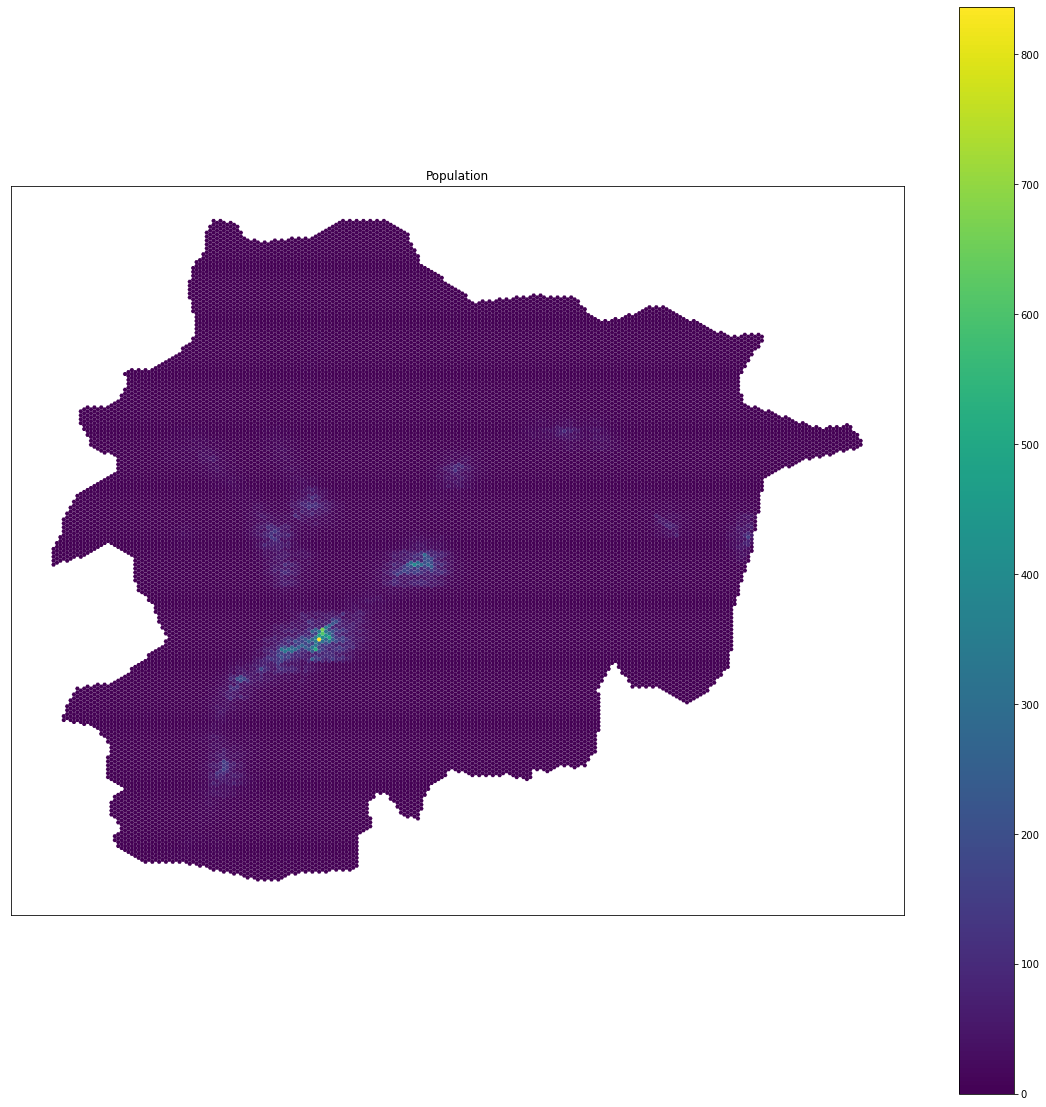

In [6]:
hb = load_hexbins(project)

pth_fig = join(fldr, 'population_small_areas.png')

quick_map(hb, 'population', title='Population', path_to_figure=pth_fig)

## Per subdivision

<AxesSubplot:title={'center':'Population'}>

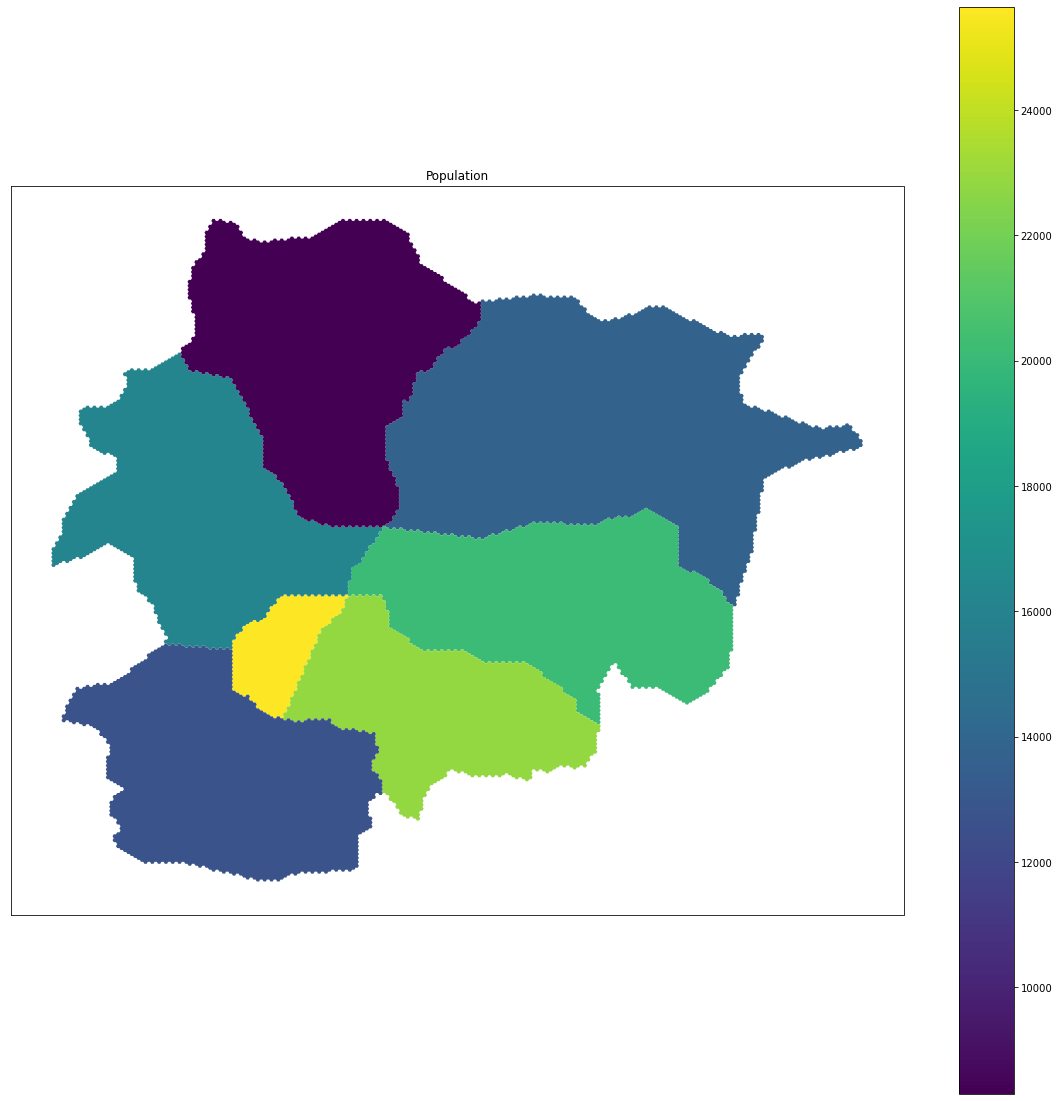

In [7]:
div = hb.dissolve(by='country_subdivision', aggfunc='sum')
div.to_crs(3857, inplace=True)

pth_fig = join(fldr, 'population_country_subdivisions.png')
quick_map(div, 'population', title='Population', path_to_figure=pth_fig)

# Population DENSITY Per zone

In [8]:
sql = "SELECT zone_id, population, Hex(ST_AsBinary(GEOMETRY)) geometry FROM zones;"
zones  = gpd.GeoDataFrame.from_postgis(sql, project.conn, geom_col="geometry", crs=4326)
zones.to_crs(3857, inplace=True)

<AxesSubplot:title={'center':'Population density (People/km2)'}>

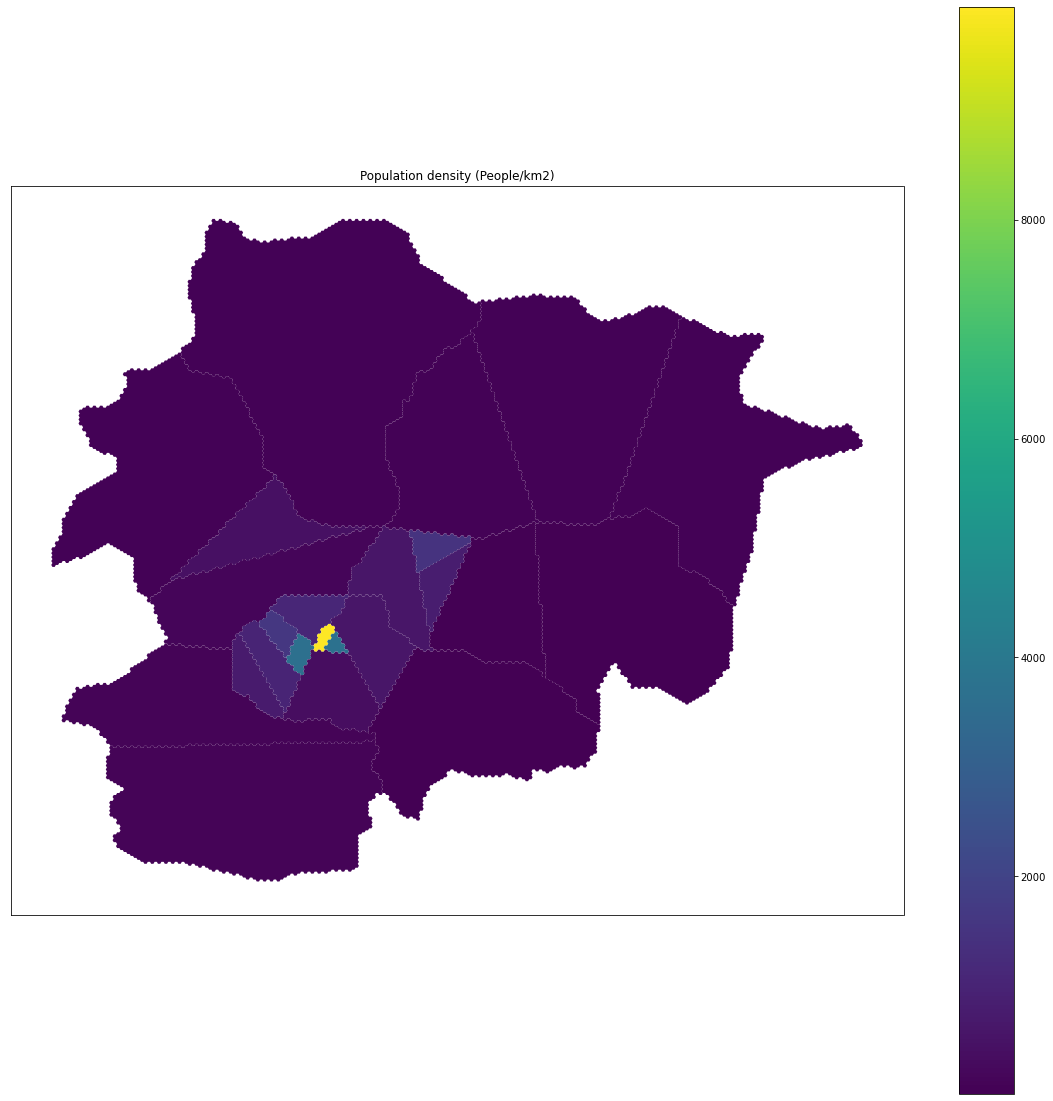

In [9]:
zones['pop_density'] = zones.population/zones.geometry.area * 1000*1000

pth_fig = join(fldr, 'population_density_zones.png')
quick_map(zones, 'pop_density', title='Population density (People/km2)', path_to_figure=pth_fig)

In [10]:
project.close()